In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#fetching train and test data
trainimg = np.load('gdrive/MyDrive/tomatoleaf/train.npy', allow_pickle=True)
testimg = np.load('gdrive/MyDrive/tomatoleaf/test.npy', allow_pickle=True)
trainlabel = np.load('gdrive/MyDrive/tomatoleaf/trainlabel.npy', allow_pickle=True)
testlabel = np.load('gdrive/MyDrive/tomatoleaf/testlabel.npy', allow_pickle=True)

In [ ]:
print(type(trainimg))
print(type(trainlabel))
print(trainimg.shape)
print(trainlabel.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10004, 256, 256, 3)
(10004,)


In [ ]:
print(trainlabel)

['healthy' 'healthy' 'healthy' ... 'mite' 'mite' 'mite']


In [ ]:
np.unique(testlabel)

array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
#Encoding of classes
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y = lenc.fit_transform(testlabel)
print(np.unique(y))
lenc.classes_

[0 1 2 3 4 5]


array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
lenc2 = LabelEncoder()
x = lenc2.fit_transform(trainlabel)
print(np.unique(y))
lenc2.classes_

[0 1 2 3 4 5]


array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
#binary class matrix
x = tf.keras.utils.to_categorical(x)
x.shape

(10004, 6)

In [ ]:
y = tf.keras.utils.to_categorical(y)
y.shape

(1000, 6)

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.applications.resnet import ResNet50

In [ ]:
inputShape = (256, 256, 3)
base_model = ResNet50(input_shape=inputShape, include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
layer1 = Flatten()(base_model.output)
layer1 = Dense(216, activation='relu')(layer1)
predictions = Dense(6, activation='softmax')(layer1)
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
model.compile( loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(trainimg, x,epochs=30,batch_size=32, validation_data=(testimg, y))

Epoch 1/30
313/313 [==============================] - 129s 314ms/step - loss: 0.4664 - accuracy: 0.8678 - val_loss: 0.2740 - val_accuracy: 0.9170
Epoch 2/30
313/313 [==============================] - 95s 304ms/step - loss: 0.0422 - accuracy: 0.9873 - val_loss: 0.2389 - val_accuracy: 0.9370
Epoch 3/30
313/313 [==============================] - 95s 304ms/step - loss: 0.0095 - accuracy: 0.9992 - val_loss: 0.2493 - val_accuracy: 0.9410
Epoch 4/30
313/313 [==============================] - 95s 304ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2268 - val_accuracy: 0.9460
Epoch 5/30
313/313 [==============================] - 95s 304ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2307 - val_accuracy: 0.9460
Epoch 6/30
313/313 [==============================] - 95s 304ms/step - loss: 7.1264e-04 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9460
Epoch 7/30
313/313 [==============================] - 95s 303ms/step - loss: 5.3248e-04 - accuracy: 1.0000 - val_loss: 0.2418

In [ ]:
#saving model
model.save("/content/gdrive/MyDrive/tomatoleaf/model2resnet.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
#saving weights of model
model.save_weights("/content/gdrive/MyDrive/tomatoleaf/resnet50_weights.h5")

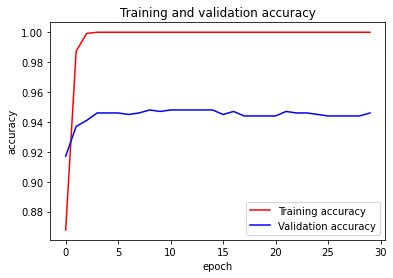

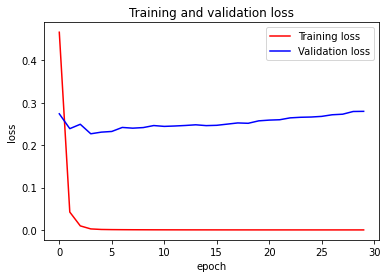

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
#plt.ylim(ymax = 1.2, ymin = 0)
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
newModel = tf.keras.models.load_model("/content/gdrive/MyDrive/tomatoleaf/model2resnet.h5")

In [ ]:
newModel.summary()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = newModel.evaluate(testimg, y)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
32/32 [==============================] - 10s 266ms/step - loss: 0.2798 - accuracy: 0.9460
Test Accuracy: 94.59999799728394
